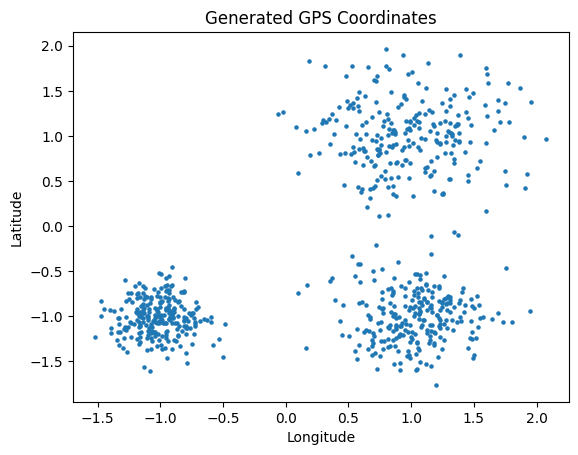

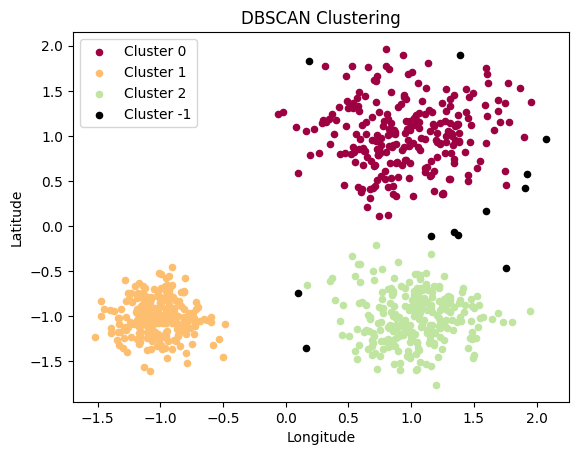

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Rastgele GPS verisi oluştur
np.random.seed(0)
centers = [[1, 1], [-1, -1], [1, -1]]
clusters_std = [0.4, 0.2, 0.3]

# Normal dağılım gösteren rastgele veri noktaları oluştur
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=750, centers=centers, cluster_std=clusters_std)

# Veri setini çizdir
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title('Generated GPS Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Verileri ölçeklendir
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur ve eğit
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X_scaled)

# Küme etiketlerini elde et
labels = dbscan.labels_

# Sonuçları çizdir
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Gürültü noktaları siyah renkte göster
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], s=20, color=tuple(col), label=f'Cluster {k}')

plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
